# Assignment 2(b)

The data for this assignment FF_data_2021_daily.csv is from Kenneth French’s data library 

(specifically from the Fama/French 3 Factors dataset). 

The CSV file has been manipulated a little so that it can be loaded easily with pandas. 

I deleted the preamble at the top of the file and deleted the annual returns data at the end of the file. 

See the following website for more details on this dataset:

(http://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html#Research)

Q1

Read in the CSV file into Jupyter Notebook using Pandas. Use the following command:

import pandas as pd

(Change this root to your own directory)

root = 'C:/Users/conal/Dropbox/Machine Learning/Data' 

df=pd.read_csv(root +'/FF_data_2021_daily.csv', index_col='Date',parse_dates=True)

In [1]:
import pandas as pd
root = '/Users/W.YSun/Desktop/python' 
df=pd.read_csv(root +'/FF_data_2021_daily.csv', index_col='Date',parse_dates=True)

Q2

Print the first five rows and the last five rows of the dataset using the following commands:

df.head()

df.tail()

In [2]:
df.head()

,Mkt-RF,SMB,HML,RF
Date,,,,
1926-07-01,0.10,-0.24,-0.28,0.009
1926-07-02,0.45,-0.32,-0.08,0.009
1926-07-06,0.17,0.27,-0.35,0.009
1926-07-07,0.09,-0.59,0.03,0.009
1926-07-08,0.21,-0.36,0.15,0.009


In [3]:
df.tail()

,Mkt-RF,SMB,HML,RF
Date,,,,
2021-06-24,0.68,0.62,0.23,0.0
2021-06-25,0.32,-0.68,0.46,0.0
2021-06-28,0.23,-0.48,-1.59,0.0
2021-06-29,0.01,-0.23,-0.27,0.0
2021-06-30,0.08,-0.11,0.78,0.0


Q3 

Compute summary statistics of the four factors 

(the market risk premium ‘Mkt-RF’, the size portfolio ‘SMB’, the value portfolio ‘HML’, and the risk-free rate ‘RF’ ). 

You can use the following command:

df.describe()

In [4]:
df.describe()

,Mkt-RF,SMB,HML,RF
count,25020.000000,25020.000000,25020.000000,25020.000000
mean,0.030713,0.005042,0.014327,0.012215
std,1.077460,0.588423,0.609841,0.011921
min,-17.440000,-11.620000,-5.980000,-0.003000
25%,-0.400000,-0.250000,-0.240000,0.001000
50%,0.060000,0.020000,0.000000,0.010000
75%,0.500000,0.270000,0.260000,0.020000
max,15.760000,8.210000,8.430000,0.061000


Q4

Plot histograms for each of the four variables.

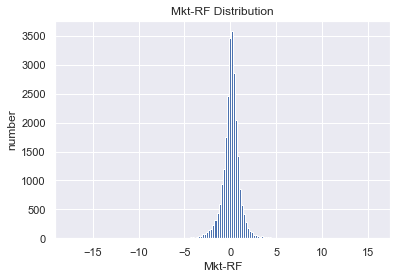

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set() # set plot style
plt.hist(df['Mkt-RF'],bins = 150)
plt.title('Mkt-RF Distribution')
plt.xlabel('Mkt-RF')
plt.ylabel('number');

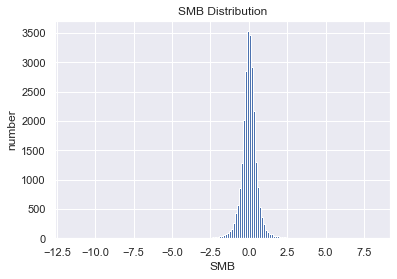

In [6]:
plt.hist(df['SMB'],bins = 150)
plt.title('SMB Distribution')
plt.xlabel('SMB')
plt.ylabel('number');

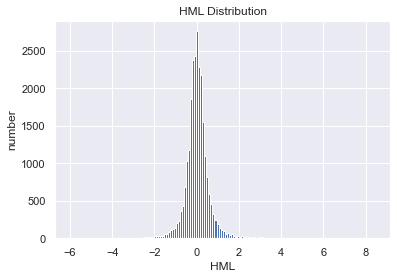

In [7]:
plt.hist(df['HML'],bins = 150)
plt.title('HML Distribution')
plt.xlabel('HML')
plt.ylabel('number');

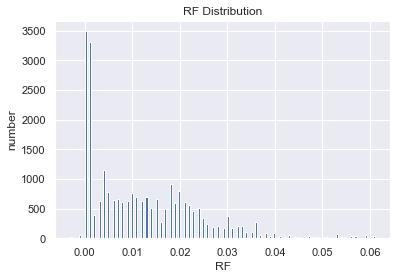

In [8]:
plt.hist(df['RF'],bins = 150)
plt.title('RF Distribution')
plt.xlabel('RF')
plt.ylabel('number');

Q5

Create new columns in the dataset that depict the cumulative returns to an investor who invests $1 dollar in each factor 

(the market risk premium ‘Mkt-RF’, the size portfolio ‘SMB’, the value portfolio ‘HML’, and the risk-free rate ‘RF’ ) 

from the outset and re-invests winnings and losses. 

Note that the returns in the FF dataset are presented as percentages, so we first must convert these returns to decimal places, then add 1 to each value and finally take the cumulative product. 

To add new columns to the dataframe, see the lecture slides on pandas and use code like the following:

cumulative products of the original four columns.

df['New'] = (1+df['Original']*?).function_name???

In [9]:
cumproduct = df.copy()
cumproduct = ((cumproduct/100) + 1 ).cumprod()
cumproduct

,Mkt-RF,SMB,HML,RF
Date,,,,
1926-07-01,1.001000,0.997600,0.997200,1.000090
1926-07-02,1.005504,0.994408,0.996402,1.000180
1926-07-06,1.007214,0.997093,0.992915,1.000270
1926-07-07,1.008120,0.991210,0.993213,1.000360
1926-07-08,1.010237,0.987641,0.994703,1.000450
...,...,...,...,...
2021-06-24,503.781098,2.320867,22.797266,21.238714
2021-06-25,505.393198,2.305085,22.902134,21.238714
2021-06-28,506.555602,2.294021,22.537990,21.238714


In [10]:
df['CS_MRP'] = cumproduct['Mkt-RF']
df['CS_SMB'] = cumproduct['SMB']
df['CS_HML'] = cumproduct['HML']
df['CS_RF'] = cumproduct['RF']

df

,Mkt-RF,SMB,HML,RF,CS_MRP,CS_SMB,CS_HML,CS_RF
Date,,,,,,,,
1926-07-01,0.10,-0.24,-0.28,0.009,1.001000,0.997600,0.997200,1.000090
1926-07-02,0.45,-0.32,-0.08,0.009,1.005504,0.994408,0.996402,1.000180
1926-07-06,0.17,0.27,-0.35,0.009,1.007214,0.997093,0.992915,1.000270
1926-07-07,0.09,-0.59,0.03,0.009,1.008120,0.991210,0.993213,1.000360
1926-07-08,0.21,-0.36,0.15,0.009,1.010237,0.987641,0.994703,1.000450
...,...,...,...,...,...,...,...,...
2021-06-24,0.68,0.62,0.23,0.000,503.781098,2.320867,22.797266,21.238714
2021-06-25,0.32,-0.68,0.46,0.000,505.393198,2.305085,22.902134,21.238714
2021-06-28,0.23,-0.48,-1.59,0.000,506.555602,2.294021,22.537990,21.238714


Q6

Plot the cumulative returns of these for the four factors using the following commands:

df[['CS_MRP', 'CS_SMB', 'CS_HML','CS_RF']].plot()

plt.ylabel('Cum Returns');

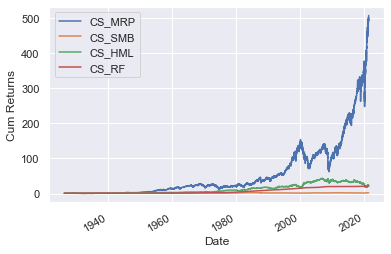

In [11]:
df[['CS_MRP', 'CS_SMB', 'CS_HML','CS_RF']].plot()
plt.ylabel('Cum Returns');

Q7

Create a new dataframe that includes dates between 2000-01 and 2020-06 and includes the original four factors but not the cumulative return columns.

df_new = df.loc['2000-01':'2021-06', 'Mkt-RF':'RF']

In [12]:
df_new = df.loc['2000-01':'2021-06', 'Mkt-RF':'RF']
df_new

,Mkt-RF,SMB,HML,RF
Date,,,,
2000-01-03,-0.71,0.61,-1.40,0.021
2000-01-04,-4.06,0.01,2.06,0.021
2000-01-05,-0.09,0.18,0.19,0.021
2000-01-06,-0.73,-0.42,1.27,0.021
2000-01-07,3.21,-0.49,-1.42,0.021
...,...,...,...,...
2021-06-24,0.68,0.62,0.23,0.000
2021-06-25,0.32,-0.68,0.46,0.000
2021-06-28,0.23,-0.48,-1.59,0.000


 Q8
 
 Re-calculate summary statistics on the new dataframe.

In [13]:
df_new.describe()

,Mkt-RF,SMB,HML,RF
count,5408.000000,5408.000000,5408.000000,5408.000000
mean,0.031093,0.010655,0.008066,0.006048
std,1.259386,0.631945,0.754735,0.007124
min,-12.000000,-4.710000,-4.890000,0.000000
25%,-0.480000,-0.350000,-0.310000,0.000000
50%,0.070000,0.020000,-0.010000,0.004000
75%,0.600000,0.370000,0.300000,0.009000
max,11.350000,5.540000,6.700000,0.026000


Q9

Create additional columns in the new dataframe that calculate cumulative returns assuming the investor invests $1 at the beginning of the year 2000. 

Plot the cumulative returns since 2000 using these new columns.

In [14]:
cumproduct = df_new.copy()
cumproduct = ( (cumproduct/100) + 1 ).cumprod() 
cumproduct

,Mkt-RF,SMB,HML,RF
Date,,,,
2000-01-03,0.992900,1.006100,0.986000,1.000210
2000-01-04,0.952588,1.006201,1.006312,1.000420
2000-01-05,0.951731,1.008012,1.008224,1.000630
2000-01-06,0.944783,1.003778,1.021028,1.000840
2000-01-07,0.975111,0.998860,1.006529,1.001050
...,...,...,...,...
2021-06-24,3.473266,1.621237,1.334857,1.386852
2021-06-25,3.484381,1.610212,1.340998,1.386852
2021-06-28,3.492395,1.602483,1.319676,1.386852


In [15]:
df_new['CS_MRP'] = cumproduct['Mkt-RF']
df_new['CS_SMB'] = cumproduct['SMB']
df_new['CS_HML'] = cumproduct['HML']
df_new['CS_RF'] = cumproduct['RF']

df_new

,Mkt-RF,SMB,HML,RF,CS_MRP,CS_SMB,CS_HML,CS_RF
Date,,,,,,,,
2000-01-03,-0.71,0.61,-1.40,0.021,0.992900,1.006100,0.986000,1.000210
2000-01-04,-4.06,0.01,2.06,0.021,0.952588,1.006201,1.006312,1.000420
2000-01-05,-0.09,0.18,0.19,0.021,0.951731,1.008012,1.008224,1.000630
2000-01-06,-0.73,-0.42,1.27,0.021,0.944783,1.003778,1.021028,1.000840
2000-01-07,3.21,-0.49,-1.42,0.021,0.975111,0.998860,1.006529,1.001050
...,...,...,...,...,...,...,...,...
2021-06-24,0.68,0.62,0.23,0.000,3.473266,1.621237,1.334857,1.386852
2021-06-25,0.32,-0.68,0.46,0.000,3.484381,1.610212,1.340998,1.386852
2021-06-28,0.23,-0.48,-1.59,0.000,3.492395,1.602483,1.319676,1.386852


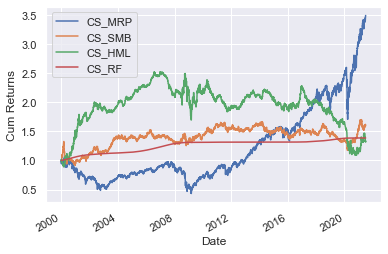

In [16]:
df_new[['CS_MRP', 'CS_SMB', 'CS_HML','CS_RF']].plot()
plt.ylabel('Cum Returns');

Q10

Extract the original four factors from the new dataframe when ‘Mkt-RF’ is zero or positive.

Display summary statistics

In [17]:
df_q10 = df.loc[df['Mkt-RF']>=0,['Mkt-RF','SMB','HML','RF']]

In [18]:
df_q10.describe()

,Mkt-RF,SMB,HML,RF
count,13679.000000,13679.000000,13679.000000,13679.000000
mean,0.659230,-0.037342,0.045733,0.011932
std,0.787917,0.593447,0.606118,0.011664
min,0.000000,-11.620000,-4.890000,-0.003000
25%,0.200000,-0.270000,-0.230000,0.001000
50%,0.440000,-0.020000,0.000000,0.009000
75%,0.840000,0.230000,0.260000,0.019000
max,15.760000,8.210000,8.430000,0.061000


Q11

Extract the original four factors from the new dataframe when ‘Mkt-RF’ is negative. 

Display summary statistics.

In [19]:
df_q11 = df.loc[df['Mkt-RF']<0,['Mkt-RF','SMB','HML','RF']]

In [20]:
df_q11.describe()

,Mkt-RF,SMB,HML,RF
count,11341.000000,11341.000000,11341.000000,11341.000000
mean,-0.727375,0.056163,-0.023554,0.012556
std,0.872480,0.578211,0.612189,0.012215
min,-17.440000,-5.140000,-5.980000,-0.003000
25%,-0.950000,-0.210000,-0.260000,0.001000
50%,-0.460000,0.060000,0.010000,0.010000
75%,-0.190000,0.320000,0.260000,0.020000
max,-0.010000,6.190000,4.540000,0.061000


Q12

Comment on the difference in summary statistics on days when the market excess return is positive and on days when the market excess return is negative.

In [21]:
df_q10.describe(), df_q11.describe()

(             Mkt-RF           SMB           HML            RF
 count  13679.000000  13679.000000  13679.000000  13679.000000
 mean       0.659230     -0.037342      0.045733      0.011932
 std        0.787917      0.593447      0.606118      0.011664
 min        0.000000    -11.620000     -4.890000     -0.003000
 25%        0.200000     -0.270000     -0.230000      0.001000
 50%        0.440000     -0.020000      0.000000      0.009000
 75%        0.840000      0.230000      0.260000      0.019000
 max       15.760000      8.210000      8.430000      0.061000,
              Mkt-RF           SMB           HML            RF
 count  11341.000000  11341.000000  11341.000000  11341.000000
 mean      -0.727375      0.056163     -0.023554      0.012556
 std        0.872480      0.578211      0.612189      0.012215
 min      -17.440000     -5.140000     -5.980000     -0.003000
 25%       -0.950000     -0.210000     -0.260000      0.001000
 50%       -0.460000      0.060000      0.010000      

First, there are more positive counts than the negative counts. Good days are more than bad days.

Secondly, the absolute value of the mean is larger when the retern is negative. A bad day normally loses more than a good day can earn.

Thirdly, the standard deviation is also larger when the return is negative, the phenomenon has been extensively documented in finance literature.

Lastly, the overall return data is left skew: the absolute value of 75% in positive subset is less than the absolute value of 25% negative subset, and 50% also exhitbits the same structure.